In [1]:
import sys
sys.path.append("/richmondvol1/rusty/stompy")

In [2]:
import matplotlib.pyplot as plt
from matplotlib import dates
import xarray as xr
import pandas as pd
import os, glob
import six
from stompy.plot import plot_wkb
from stompy import utils
from matplotlib import gridspec

import seaborn as sns
import numpy as np
%matplotlib notebook

In [11]:
from stompy.grid import unstructured_grid
from stompy.spatial import field
import stompy.model.delft.dflow_model as dfm
import bloom_common

In [4]:
scene_df=bloom_common.load_chl_scenes()

In [12]:
aerial=field.GdalGrid("sfbay_bing_satellite.png")

Putting multiple channels as last index


In [18]:
model=dfm.DFlowModel.load("dfm_spinup")
grid=model.grid
shore=grid.boundary_polygon()
from shapely import geometry, prepared
shore_prep=prepared.prep(shore)

INFO:join_features:0 open strings, 16 simple polygons
INFO:join_features:Building index
INFO:UnstructuredGrid:Warning, boundary_polygon() failed using edges!  Trying polygon union method


In [42]:
rec.acquisition_start.strftime("%Y-%m-%d %H:%M")

'2022-08-04 18:12'

In [45]:
fig_dir="figs_rs_scenes"
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [48]:
scene_df

,xml,acquisition_start,acquisition_stop
0,rs_chl/04b_log10/20220804_BandMath_BandMath.dim,2022-08-04 18:12:01,2022-08-04 18:12:20
1,rs_chl/04b_log10/20220805_BandMath_BandMath.dim,2022-08-05 18:47:14,2022-08-05 18:47:33
2,rs_chl/04b_log10/20220806_BandMath_BandMath.dim,2022-08-06 18:21:23,2022-08-06 18:21:42
3,rs_chl/04b_log10/20220807_BandMath_BandMath.dim,2022-08-07 17:55:28,2022-08-07 17:55:46
4,rs_chl/04b_log10/20220808_BandMath_BandMath.dim,2022-08-08 18:08:18,2022-08-08 18:08:37
5,rs_chl/04b_log10/20220809_BandMath_BandMath.dim,2022-08-09 18:43:32,2022-08-09 18:43:51
6,rs_chl/04b_log10/20220810_BandMath_BandMath.dim,2022-08-10 18:17:41,2022-08-10 18:18:00
7,rs_chl/04b_log10/20220811_BandMath_BandMath.dim,2022-08-11 18:30:30,2022-08-11 18:30:49
8,rs_chl/04b_log10/20220812_BandMath_BandMath.dim,2022-08-12 18:04:36,2022-08-12 18:04:54
9,rs_chl/04b_log10/20220813_BandMath_BandMath.dim,2022-08-13 18:39:52,2022-08-13 18:40:11


In [59]:
six.moves.reload_module(bloom_common)

<module 'bloom_common' from '/richmondvol1/rusty/wy2022_bloom/bloom_common.py'>

<IPython.core.display.Javascript object>


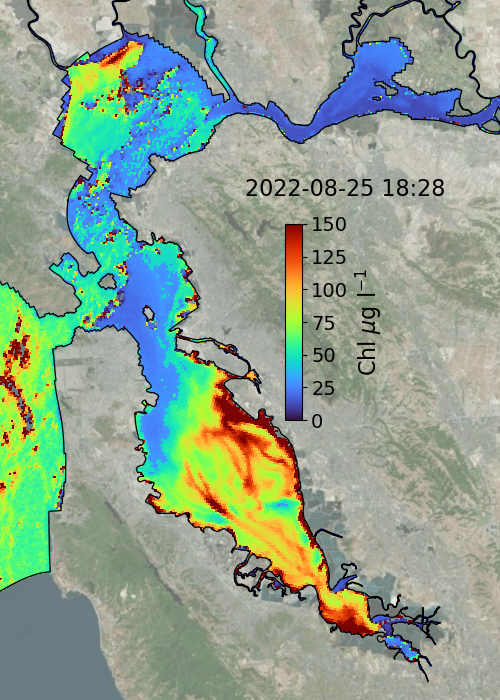

In [61]:
fig,ax=plt.subplots(figsize=(5,7))
ax.set_position([0,0,1,1])
ax.set_adjustable('datalim')
cax=fig.add_axes([0.57,0.40,0.033,0.28])

zoom=(536142., 600695., 4136659., 4227033.)

chl_clim=[0,150]
for rec in scene_df.itertuples():
    ax.cla()
    cax.cla()
    
    aerial.plot(zorder=-1,ax=ax,alpha=0.6)
    xyz=bloom_common.load_scene_utm(rec.xml,ravel=False)
    # special case handling for 08-25 which lost its land mask.
    if "20220825" in rec.xml:
        orig_shape=xyz.shape
        rav=xyz.reshape([-1,3]).copy()
        on_land = [not shore_prep.intersects( geometry.Point(p[0],p[1]) ) 
                   for p in utils.progress(rav)]
        rav[on_land,2] =np.nan
        xyz=rav.reshape(xyz.shape)
        
    coll_rs=bloom_common.plot_xyz(xyz,ax=ax,cmap='turbo',zorder=2)
    coll_rs.set_clim(chl_clim)
    plt.colorbar(coll_rs,cax=cax,label="Chl $\mu$g l$^{-1}$")
    anno_color='k'
    #cax.title.set_color(anno_color)
    plt.setp(cax.get_yticklabels(),color=anno_color,fontsize=14)
    plt.setp(cax.yaxis.get_label(),color=anno_color,fontsize=16)
    plot_wkb.plot_wkb(shore,fc='none',ec=anno_color,lw=0.9,zorder=4,ax=ax)
    ax.text(0.49,0.72,rec.acquisition_start.strftime("%Y-%m-%d %H:%M"),
            transform=ax.transAxes,color=anno_color,fontsize=16)
    ax.set_aspect(1.0)
    ax.axis('off')
    ax.axis(zoom)
    
    fig.savefig(os.path.join(fig_dir,f"scene_{rec.acquisition_start.strftime('%Y%m%dT%H%M')}_v00.png"))
